## Bank Loan Analysis ##

Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotly.express as px

In [25]:
df = pd.read_excel("E:/CODE/DAP(large)/financial_loan_data_excel.xlsx")
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


Metadata of Data

In [26]:
print("No of Rows:", df.shape[0])
print("No of Columns:", df.shape[1])
df.dtypes

No of Rows: 38576
No of Columns: 24


id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

Total Loan Applications

In [45]:
total_loan_applications = df['id'].count()
print("Total Loan Applications:", total_loan_applications)

Total Loan Applications: 38576


MTD Total Loan Applications

In [34]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}):{mtd_loan_applications}")

MTD Loan Applications (for December 2021):4314


Total Funded Amount

In [ ]:
total_funded_amount = df['loan_amount'].sum()
print("Total Funded Amount: ${:.2f}M".format(total_funded_amount/1000000))

Total Funded Amount: $435.76M


MTD Total Funded Amount

In [37]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()

print("MTD Total Funded Amount: ${:.2f}M".format(mtd_total_funded_amount/1000000))

MTD Total Funded Amount: $53.98M


Total Amount Recieved

In [38]:
total_amount_recieved = df['total_payment'].sum()
print("Total Amount Recieved: ${:.2f}M".format(total_amount_recieved/1000000))

Total Amount Recieved: $473.07M


MTD Total Amount Recieved

In [40]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_recieved = mtd_data['total_payment'].sum()

print("MTD Total Amount Recieved: ${:.2f}M".format(mtd_total_amount_recieved/1000000))

MTD Total Amount Recieved: $58.07M


Average Interest Rate

In [43]:
avg_interest_rate = df['int_rate'].mean()*100
print("Avg Int Rate: {:.2f}%".format(avg_interest_rate))

Avg Int Rate: 12.05%


Average Debt-to-Income Ratio (DTI)

In [44]:
avg_dti = df['dti'].mean()*100
print("Avg DTI: {:.2f}%".format(avg_dti))

Avg DTI: 13.33%


Good Loan Metrics

In [54]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_recieved = good_loans['total_payment'].sum()

good_loan_percentage = (good_loan_applications / total_loan_applications)*100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:.2f}M".format(good_loan_funded_amount/1000000))
print("Good Loan Total Recieved (in Millions): ${:.2f}M".format(good_loan_recieved/1000000))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))




Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Recieved (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


Bad Loan Metrics

In [55]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_recieved = bad_loans['total_payment'].sum()

bad_loan_percentage = (bad_loan_applications / total_loan_applications)*100

print("Bad Loan Applications:", bad_loan_applications)
print("Bad Loan Funded Amount (in Millions): ${:.2f}M".format(bad_loan_funded_amount/1000000))
print("Bad Loan Total Recieved (in Millions): ${:.2f}M".format(bad_loan_recieved/1000000))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))




Bad Loan Applications: 5333
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Recieved (in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


Monthly Trends by Issue Date for Total Funded Amount

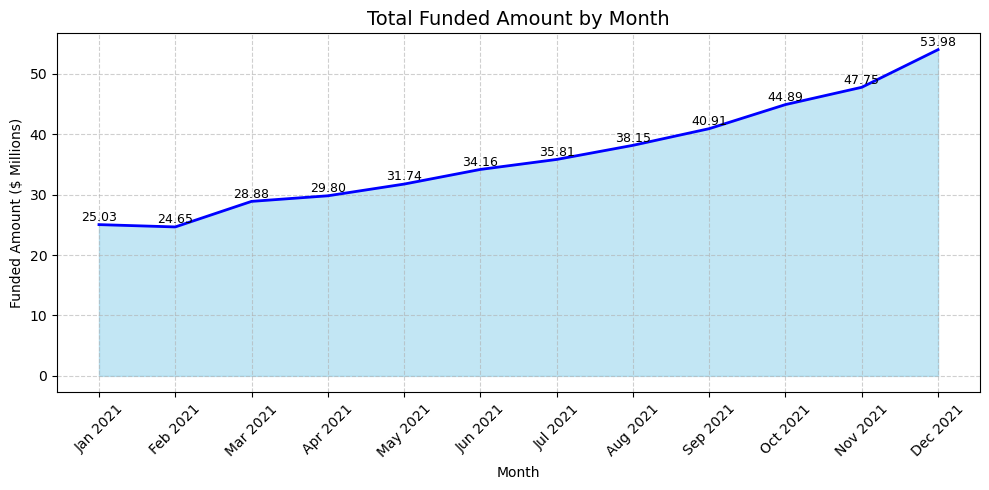

In [62]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name = lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort = False)['loan_amount']
    .sum()
    .div(1_000_000)
    .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue',alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color = 'blue', linewidth = 2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom',fontsize=9, rotation = 0, color = 'black')

plt.title('Total Funded Amount by Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation = 45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Monthly Trends by Issue Date for Total Amount Recieved

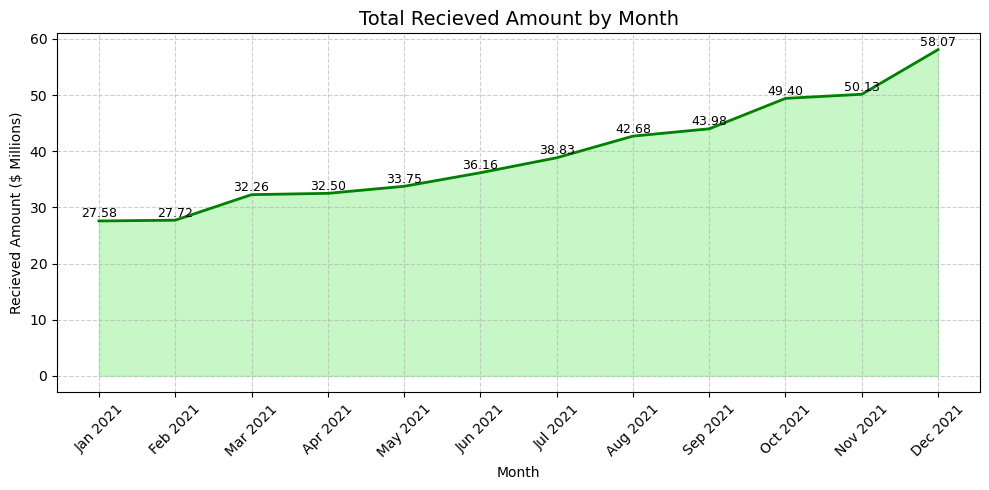

In [64]:
monthly_recieved = (
    df.sort_values('issue_date')
    .assign(month_name = lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort = False)['total_payment']
    .sum()
    .div(1_000_000)
    .reset_index(name='recieved_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_recieved['month_name'], monthly_recieved['recieved_amount_millions'], color='lightgreen',alpha=0.5)
plt.plot(monthly_recieved['month_name'], monthly_recieved['recieved_amount_millions'], color = 'green', linewidth = 2)

for i, row in monthly_recieved.iterrows():
    plt.text(i, row['recieved_amount_millions'] + 0.1, f"{row['recieved_amount_millions']:.2f}",
             ha='center', va='bottom',fontsize=9, rotation = 0, color = 'black')

plt.title('Total Recieved Amount by Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Recieved Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_recieved)), labels=monthly_recieved['month_name'], rotation = 45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Monthly Trends by Issue Date for Total Loan Applications

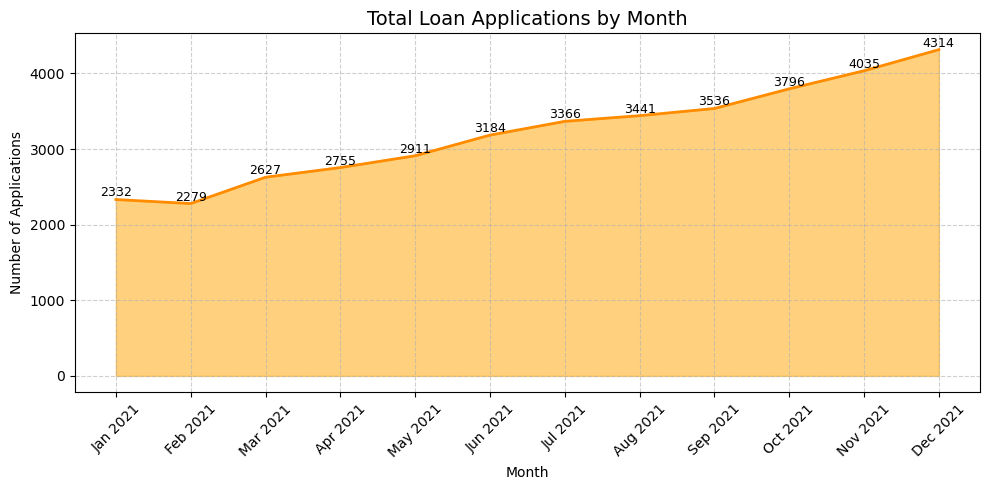

In [65]:
monthly_applications = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_applications_count'],color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'],color='darkorange', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, f"{row['loan_applications_count']}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Regional Analysis by State for Total Funded Amount

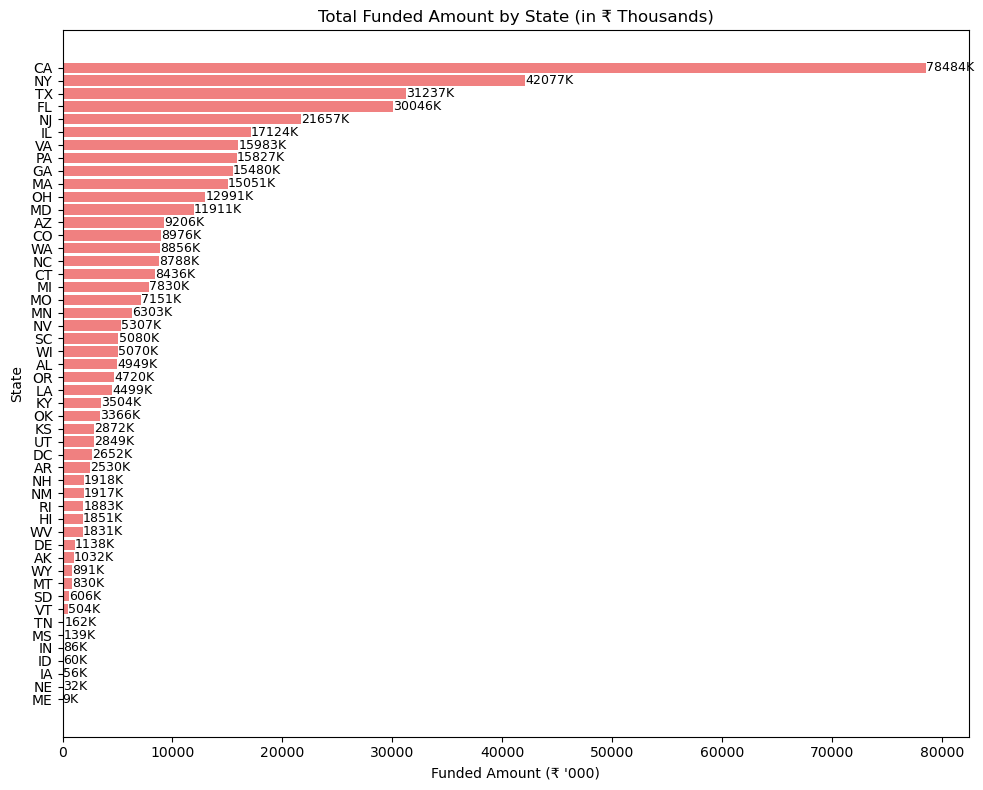

In [67]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in ₹ Thousands)')
plt.xlabel("Funded Amount (₹ '000)")
plt.ylabel('State')
plt.tight_layout()
plt.show()

Loan Term Analysis by Total Funded Amount

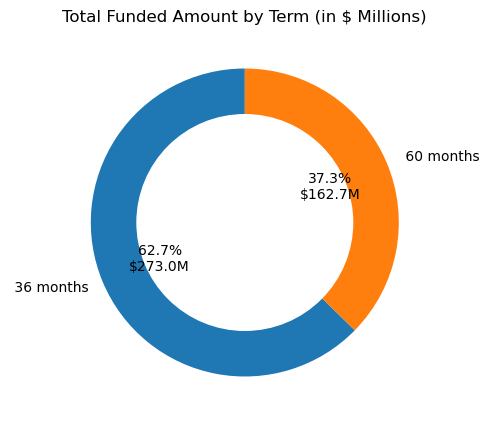

In [68]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

Employee Length by Total Funded Amount

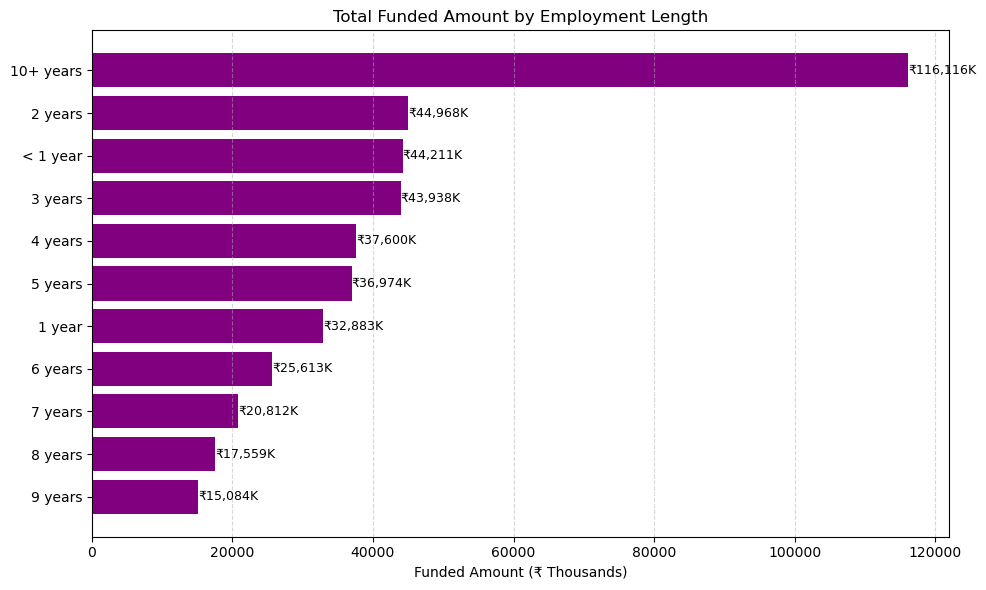

In [69]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000
emp_funding_thousands = emp_funding

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding_thousands.index, emp_funding_thousands, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f'₹{width:,.0f}K', va='center', fontsize=9)

plt.xlabel("Funded Amount (₹ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Loan Purpose by Total Funded Amount

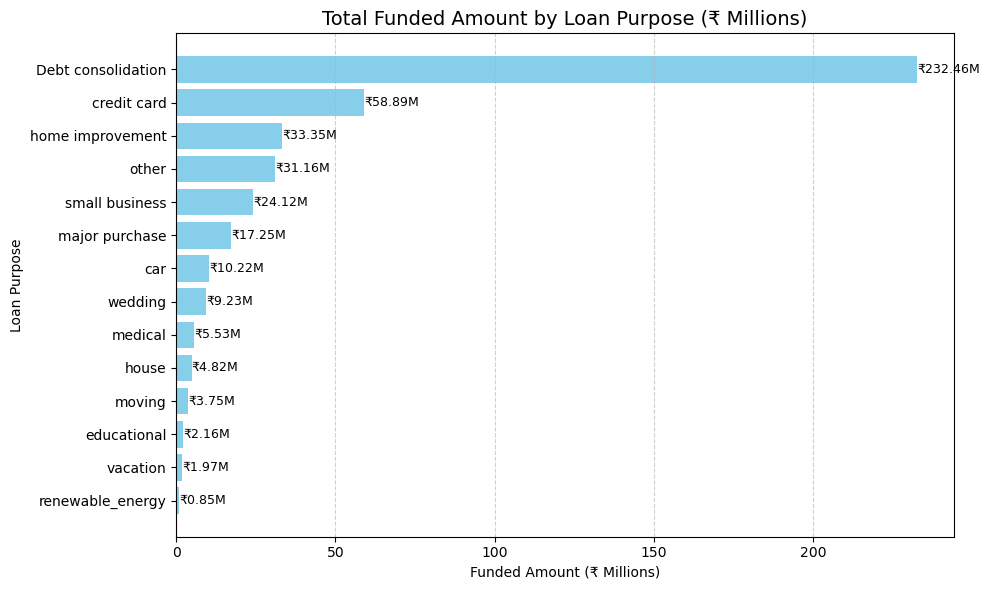

In [70]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values() / 1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'₹{width:.2f}M', va='center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose (₹ Millions)', fontsize=14)
plt.xlabel('Funded Amount (₹ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Home Ownership by Total Funded Amount

In [71]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1_000_000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership (₹ Millions)'
)

fig.show()